# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330 

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS = 48
BATCH_SIZE = 256

In [8]:
from keras import optimizers

results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
learning_rates = [0.1, 0.01, 0.001]
opts = ['SGD', 'RMSprop', 'AdaGrad', 'Adam']

def training_key(opt, lr):
    return '%s-%.3f' % (opt, lr)

for opt_name in opts:
    for lr in learning_rates:
        opt = None
        if opt_name == 'Adam':
            opt = optimizers.Adam(learning_rate=lr)
        elif opt_name == 'SGD':
            opt = optimizers.SGD(learning_rate=lr)
        elif opt_name == 'RMSprop':
            opt = optimizers.RMSprop(learning_rate=lr)
        else:
            opt = optimizers.Adagrad(learning_rate=lr)
            
        model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        results[training_key(opt_name, lr)] = model.fit(x_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS,
                  validation_data=(x_test, y_test),
                  shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/48
50000/50000 [==============================] - 5s 101us/step - loss: 2.0815 - accuracy: 0.2358 - val_loss: 2.0213 - val_accuracy: 0.2883
Epoch 2/48
50000/50000 [==============================] - 5s 105us/step - loss: 1.8844 - accuracy: 0.3265 - val_loss: 1.9272 - val_accuracy: 0.3074
Epoch 3/48
50000/50000 [==============================] - 5s 102us/step - loss: 1.7848 - accuracy: 0.3566 - val_loss: 1.8746 - val_accuracy: 0.3109
Epoch 4/48
50000/50000 [==============================] - 5s 102us/step - loss: 1.7224 - accuracy: 0.3829 - val_loss: 1.6671 - val_accuracy: 0.3998
Epoch 5/48
50000/50000 [==============================] - 5s 103us/step - loss: 1.6726 - accuracy: 0.4010 - val_loss: 1.6799 - val_accuracy: 0.3904
Epoch 6/48
50000/50000 [==============================] - 5s 106us/step - loss: 1.6356 - accuracy: 0.4159 - val_loss: 1.8402 - val_accuracy: 0.3280
Epoch 7/48
50000/50000 [==============================] - 5s 1

50000/50000 [==============================] - 5s 103us/step - loss: 0.4586 - accuracy: 0.8485 - val_loss: 1.6140 - val_accuracy: 0.5427
Epoch 8/48
50000/50000 [==============================] - 6s 113us/step - loss: 0.4494 - accuracy: 0.8526 - val_loss: 1.6336 - val_accuracy: 0.5427
Epoch 9/48
50000/50000 [==============================] - 5s 110us/step - loss: 0.4415 - accuracy: 0.8536 - val_loss: 1.6571 - val_accuracy: 0.5438
Epoch 10/48
50000/50000 [==============================] - 5s 104us/step - loss: 0.4324 - accuracy: 0.8577 - val_loss: 1.6600 - val_accuracy: 0.5408
Epoch 11/48
50000/50000 [==============================] - 5s 104us/step - loss: 0.4249 - accuracy: 0.8607 - val_loss: 1.6841 - val_accuracy: 0.5416
Epoch 12/48
50000/50000 [==============================] - 6s 114us/step - loss: 0.4173 - accuracy: 0.8643 - val_loss: 1.6933 - val_accuracy: 0.5447
Epoch 13/48
50000/50000 [==============================] - 5s 107us/step - loss: 0.4091 - accuracy: 0.8676 - val_loss: 1

Epoch 14/48
50000/50000 [==============================] - 5s 102us/step - loss: 0.1691 - accuracy: 0.9592 - val_loss: 2.3774 - val_accuracy: 0.5344
Epoch 15/48
50000/50000 [==============================] - 5s 104us/step - loss: 0.1686 - accuracy: 0.9592 - val_loss: 2.3794 - val_accuracy: 0.5345
Epoch 16/48
50000/50000 [==============================] - 5s 109us/step - loss: 0.1681 - accuracy: 0.9593 - val_loss: 2.3846 - val_accuracy: 0.5356
Epoch 17/48
50000/50000 [==============================] - 5s 106us/step - loss: 0.1676 - accuracy: 0.9595 - val_loss: 2.3866 - val_accuracy: 0.5344
Epoch 18/48
50000/50000 [==============================] - 5s 108us/step - loss: 0.1671 - accuracy: 0.9601 - val_loss: 2.3892 - val_accuracy: 0.5339
Epoch 19/48
50000/50000 [==============================] - 5s 105us/step - loss: 0.1667 - accuracy: 0.9600 - val_loss: 2.3902 - val_accuracy: 0.5344
Epoch 20/48
50000/50000 [==============================] - 6s 112us/step - loss: 0.1662 - accuracy: 0.9598

Epoch 21/48
50000/50000 [==============================] - 7s 144us/step - loss: 2.3076 - accuracy: 0.0999 - val_loss: 2.3097 - val_accuracy: 0.1000
Epoch 22/48
50000/50000 [==============================] - 7s 145us/step - loss: 2.3082 - accuracy: 0.0990 - val_loss: 2.3136 - val_accuracy: 0.1000
Epoch 23/48
50000/50000 [==============================] - 8s 152us/step - loss: 2.3083 - accuracy: 0.1000 - val_loss: 2.3102 - val_accuracy: 0.1000
Epoch 24/48
50000/50000 [==============================] - 7s 144us/step - loss: 2.3075 - accuracy: 0.1016 - val_loss: 2.3229 - val_accuracy: 0.1000
Epoch 25/48
50000/50000 [==============================] - 7s 138us/step - loss: 2.3086 - accuracy: 0.0965 - val_loss: 2.3226 - val_accuracy: 0.1000
Epoch 26/48
50000/50000 [==============================] - 7s 150us/step - loss: 2.3078 - accuracy: 0.0990 - val_loss: 2.3189 - val_accuracy: 0.1000
Epoch 27/48
50000/50000 [==============================] - 7s 142us/step - loss: 2.3081 - accuracy: 0.0975

Epoch 28/48
50000/50000 [==============================] - 7s 142us/step - loss: 2.3032 - accuracy: 0.1007 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 29/48
50000/50000 [==============================] - 7s 141us/step - loss: 2.3032 - accuracy: 0.0983 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 30/48
50000/50000 [==============================] - 7s 143us/step - loss: 2.3030 - accuracy: 0.0999 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 31/48
50000/50000 [==============================] - 7s 148us/step - loss: 2.3031 - accuracy: 0.0972 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 32/48
50000/50000 [==============================] - 7s 142us/step - loss: 2.3031 - accuracy: 0.0991 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 33/48
50000/50000 [==============================] - 7s 140us/step - loss: 2.3032 - accuracy: 0.0971 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 34/48
50000/50000 [==============================] - 7s 144us/step - loss: 2.3031 - accuracy: 0.0988

Epoch 35/48
50000/50000 [==============================] - 8s 155us/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 36/48
50000/50000 [==============================] - 8s 154us/step - loss: 2.3027 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 37/48
50000/50000 [==============================] - 7s 149us/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 38/48
50000/50000 [==============================] - 8s 163us/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 39/48
50000/50000 [==============================] - 7s 150us/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 40/48
50000/50000 [==============================] - 7s 147us/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 41/48
50000/50000 [==============================] - 7s 148us/step - loss: 2.3027 - accuracy: 0.0982

Epoch 42/48
50000/50000 [==============================] - 7s 138us/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 43/48
50000/50000 [==============================] - 7s 140us/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 44/48
50000/50000 [==============================] - 7s 150us/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 45/48
50000/50000 [==============================] - 7s 144us/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 46/48
50000/50000 [==============================] - 7s 142us/step - loss: 2.3027 - accuracy: 0.0952 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 47/48
50000/50000 [==============================] - 7s 142us/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 48/48
50000/50000 [==============================] - 7s 147us/step - loss: 2.3027 - accuracy: 0.0981

Train on 50000 samples, validate on 10000 samples
Epoch 1/48
50000/50000 [==============================] - 8s 158us/step - loss: 2.3026 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/48
50000/50000 [==============================] - 8s 150us/step - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/48
50000/50000 [==============================] - 8s 157us/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/48
50000/50000 [==============================] - 8s 150us/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/48
50000/50000 [==============================] - 7s 142us/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/48
50000/50000 [==============================] - 7s 141us/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/48
50000/50000 [==============================] - 7s 1

50000/50000 [==============================] - 8s 156us/step - loss: 2.3072 - accuracy: 0.0990 - val_loss: 2.3109 - val_accuracy: 0.1000
Epoch 8/48
50000/50000 [==============================] - 7s 149us/step - loss: 2.3070 - accuracy: 0.0997 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 9/48
50000/50000 [==============================] - 7s 149us/step - loss: 2.3070 - accuracy: 0.0992 - val_loss: 2.3080 - val_accuracy: 0.1000
Epoch 10/48
50000/50000 [==============================] - 8s 151us/step - loss: 2.3072 - accuracy: 0.0987 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 11/48
50000/50000 [==============================] - 8s 152us/step - loss: 2.3067 - accuracy: 0.0977 - val_loss: 2.3067 - val_accuracy: 0.1000
Epoch 12/48
50000/50000 [==============================] - 7s 149us/step - loss: 2.3067 - accuracy: 0.0987 - val_loss: 2.3104 - val_accuracy: 0.1000
Epoch 13/48
50000/50000 [==============================] - 7s 149us/step - loss: 2.3072 - accuracy: 0.0994 - val_loss: 2

Epoch 14/48
50000/50000 [==============================] - 8s 161us/step - loss: 2.3032 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 15/48
50000/50000 [==============================] - 8s 166us/step - loss: 2.3031 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 16/48
50000/50000 [==============================] - 8s 164us/step - loss: 2.3032 - accuracy: 0.1005 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 17/48
50000/50000 [==============================] - 8s 151us/step - loss: 2.3032 - accuracy: 0.0976 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 18/48
50000/50000 [==============================] - 8s 153us/step - loss: 2.3031 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 19/48
50000/50000 [==============================] - 8s 158us/step - loss: 2.3032 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 20/48
50000/50000 [==============================] - 8s 153us/step - loss: 2.3031 - accuracy: 0.1012

Epoch 21/48
50000/50000 [==============================] - 8s 163us/step - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 22/48
50000/50000 [==============================] - 8s 162us/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 23/48
50000/50000 [==============================] - 8s 169us/step - loss: 2.3027 - accuracy: 0.0961 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 24/48
50000/50000 [==============================] - 9s 177us/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 25/48
50000/50000 [==============================] - 9s 172us/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 26/48
50000/50000 [==============================] - 9s 171us/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 27/48
50000/50000 [==============================] - 8s 168us/step - loss: 2.3027 - accuracy: 0.0976

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

def plot_result(opt):
    plt.figure(figsize=(16.0, 6.0))
    for i in range(len(learning_rates)):
        label = training_key(opt, lr)
        train_loss = results[label].history["loss"]
        valid_loss = results[label].history["val_loss"]

        train_acc = results[label].history["accuracy"]
        valid_acc = results[label].history["val_accuracy"]

        plt.subplot(2, len(learning_rates), i+1)
        plt.subplots_adjust(wspace=0.2, hspace=0.4)
        plt.plot(range(len(train_loss)), train_loss, label="train loss")
        plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
        plt.legend()
        plt.title("%s Loss" % (label))

        plt.subplot(2, len(learning_rates), i+1+len(learning_rates))
        plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
        plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
        plt.legend()
        plt.title("%s Accuracy" % (label))
    plt.show()

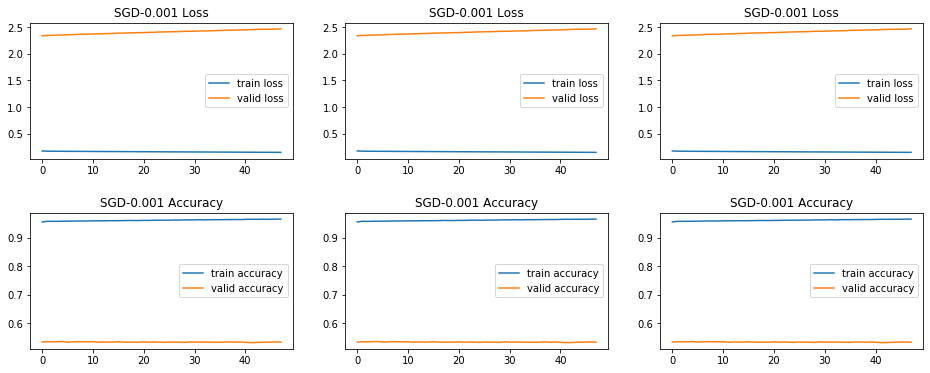

In [36]:
plot_result('SGD')

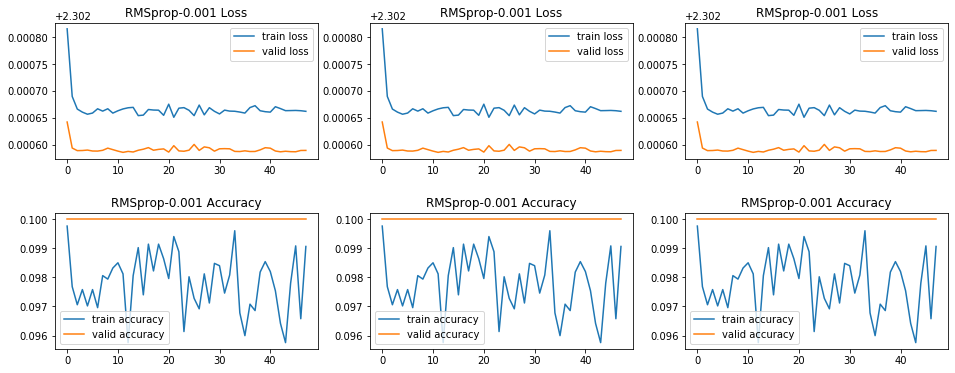

In [37]:
plot_result('RMSprop')

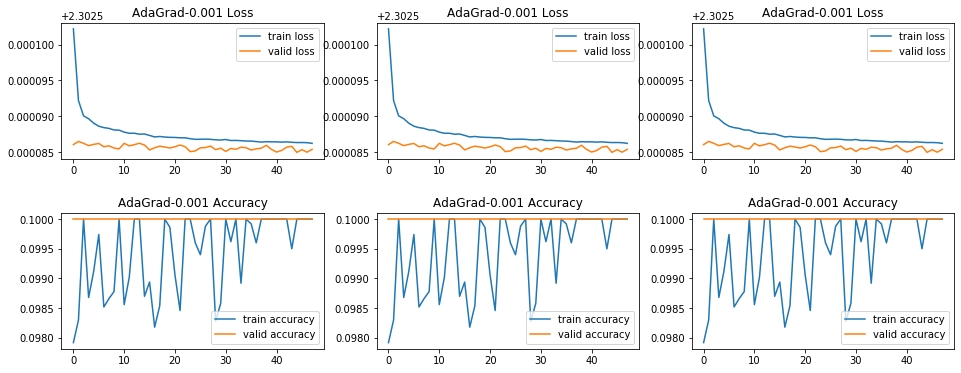

In [38]:
plot_result('AdaGrad')

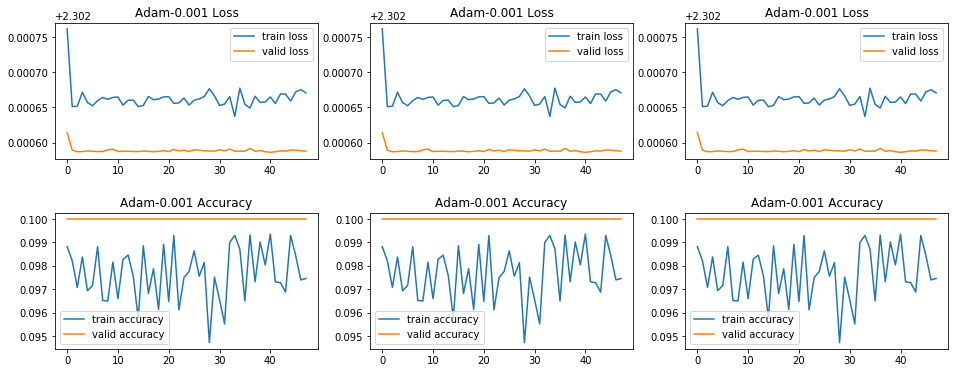

In [39]:
plot_result('Adam')